In [83]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
import requests
from datetime import datetime

In [84]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [85]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-51.799905604712755, 145.74213403657535),
 (84.30169391618853, 119.13421253415635),
 (70.76190698252486, -177.48565223497107),
 (19.26231969903324, -102.24168601783532),
 (-60.015041379722376, -149.04779921520864),
 (64.33346139807779, -115.22962834513446),
 (76.53741338810312, 1.5155698671534878),
 (-68.70803361586194, 73.41244765809779),
 (-26.178677624100644, -70.36227367561654),
 (76.3000057468252, -133.4514905673679),
 (-68.91531744625135, -28.3016162592713),
 (-61.70578657623371, 152.91838233764793),
 (-75.20669669958784, -170.79678933949106),
 (84.0880295380442, -174.19529266994525),
 (70.00177508731034, 6.767050045860714),
 (-33.19116558977089, -79.5117728075061),
 (81.81466965357859, 92.27243184152593),
 (38.62374786760216, -78.5885932015029),
 (76.6923137351921, 80.31001031781545),
 (37.42722689454209, -168.07591827134297),
 (24.636196932252076, 15.32789027659038),
 (81.8743610287676, -125.96453972284789),
 (24.328478385340347, 46.3314293081836),
 (28.380802371133143, -35.5

In [86]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [87]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96c59c82b0c62cd93888a34be01334d3


In [88]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [106]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 25 of Set 25 | hobart
Processing Record 26 of Set 25 | saskylakh
Processing Record 27 of Set 25 | mys shmidta
City not found. Skipping...
Processing Record 28 of Set 25 | tancitaro
Processing Record 29 of Set 25 | mataura
Processing Record 30 of Set 25 | yellowknife
Processing Record 31 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 32 of Set 25 | saint-philippe
Processing Record 33 of Set 25 | diego de almagro
Processing Record 34 of Set 25 | tuktoyaktuk
Processing Record 35 of Set 25 | ushuaia
Processing Record 36 of Set 25 | vaini
Processing Record 37 of Set 25 | sorland
Processing Record 38 of Set 25 | talcahuano
Processing Record 39 of Set 25 | talnakh
Processing Record 40 of Set 25 | harrisonburg
Processing Record 41 of Set 25 | dikson
Processing Record 42 of Set 25 | kapaa
Processing Record 43 of Set 25 | marzuq
Processing Record 44 of Set 25 | riyadh
Processing Record 45 of Set 25 | ribeira grande
Processing Record 46 of Set 25 | akersbe

Processing Record 37 of Set 28 | noumea
Processing Record 38 of Set 28 | payakumbuh
Processing Record 39 of Set 28 | novo aripuana
Processing Record 40 of Set 28 | iqaluit
Processing Record 41 of Set 28 | pangnirtung
Processing Record 42 of Set 28 | byron bay
Processing Record 43 of Set 28 | abu zabad
Processing Record 44 of Set 28 | deputatskiy
Processing Record 45 of Set 28 | tynda
Processing Record 46 of Set 28 | guerrero negro
Processing Record 47 of Set 28 | paramirim
Processing Record 48 of Set 28 | margate
Processing Record 49 of Set 28 | saint-joseph
Processing Record 50 of Set 28 | richards bay
Processing Record 1 of Set 29 | ilulissat
Processing Record 2 of Set 29 | lebu
Processing Record 3 of Set 29 | oktyabrskiy
Processing Record 4 of Set 29 | hofn
Processing Record 5 of Set 29 | jacinto city
Processing Record 6 of Set 29 | shibetsu
Processing Record 7 of Set 29 | szydlowiec
Processing Record 8 of Set 29 | chara
Processing Record 9 of Set 29 | khorixas
Processing Record 10 

Processing Record 27 of Set 32 | allapalli
Processing Record 28 of Set 32 | whitehorse
Processing Record 29 of Set 32 | labuhan
Processing Record 30 of Set 32 | qaqortoq
Processing Record 31 of Set 32 | alyangula
Processing Record 32 of Set 32 | san rafael del sur
Processing Record 33 of Set 32 | lavrentiya
Processing Record 34 of Set 32 | kochubey
Processing Record 35 of Set 32 | tumsar
Processing Record 36 of Set 32 | mathathane
Processing Record 37 of Set 32 | aitape
Processing Record 38 of Set 32 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 32 | pierre
Processing Record 40 of Set 32 | zapolyarnyy
Processing Record 41 of Set 32 | upernavik
Processing Record 42 of Set 32 | trinidad
Processing Record 43 of Set 32 | puerto escondido
Processing Record 44 of Set 32 | geraldton
Processing Record 45 of Set 32 | brae
Processing Record 46 of Set 32 | hami
Processing Record 47 of Set 32 | aswan
Processing Record 48 of Set 32 | soyo
Processing Record 49 of Set 32 | ku

Processing Record 12 of Set 36 | maragogi
Processing Record 13 of Set 36 | dzerzhinsk
Processing Record 14 of Set 36 | cabatuan
Processing Record 15 of Set 36 | palo alto
Processing Record 16 of Set 36 | christchurch
Processing Record 17 of Set 36 | aklavik
Processing Record 18 of Set 36 | garbolovo
Processing Record 19 of Set 36 | khandyga
Processing Record 20 of Set 36 | merauke
Processing Record 21 of Set 36 | harta
Processing Record 22 of Set 36 | srandakan
Processing Record 23 of Set 36 | verkhoyansk
Processing Record 24 of Set 36 | dawson
Processing Record 25 of Set 36 | marienburg
Processing Record 26 of Set 36 | naftah
City not found. Skipping...
Processing Record 27 of Set 36 | tonekabon
Processing Record 28 of Set 36 | pangkalanbuun
Processing Record 29 of Set 36 | pangody
Processing Record 30 of Set 36 | puerto del rosario
Processing Record 31 of Set 36 | cururupu
Processing Record 32 of Set 36 | saurimo
Processing Record 33 of Set 36 | along
Processing Record 34 of Set 36 |

In [108]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Te Anau,100,NZ,2021-05-31 00:03:24,96,-45.4167,167.7167,47.3,5.55
1,Te Anau,100,NZ,2021-05-31 00:04:02,96,-45.4167,167.7167,47.3,5.55
2,Te Anau,100,NZ,2021-05-31 00:04:02,96,-45.4167,167.7167,47.3,5.55
3,Te Anau,100,NZ,2021-05-31 00:04:02,96,-45.4167,167.7167,47.3,5.55
4,Te Anau,100,NZ,2021-05-31 00:04:02,96,-45.4167,167.7167,47.3,5.55


In [112]:
city_data = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_city_data]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Te Anau,NZ,2021-05-31 00:03:24,-45.4167,167.7167,47.3,96,100,5.55
1,Te Anau,NZ,2021-05-31 00:04:02,-45.4167,167.7167,47.3,96,100,5.55
2,Te Anau,NZ,2021-05-31 00:04:02,-45.4167,167.7167,47.3,96,100,5.55
3,Te Anau,NZ,2021-05-31 00:04:02,-45.4167,167.7167,47.3,96,100,5.55
4,Te Anau,NZ,2021-05-31 00:04:02,-45.4167,167.7167,47.3,96,100,5.55


In [113]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [114]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

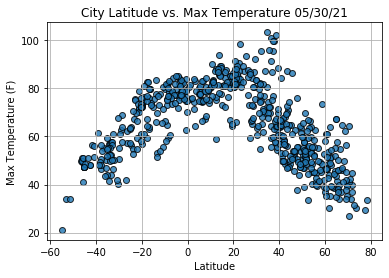

In [115]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()